## Introduction

Group players according to their ability to do damage on contact (the Blast practice data). Then build individually targeted improvement plans for all of the hitters by evaluating their in-game performance (xwOBA). 

## Method

Data include pitch level Trackman data from games and swing level Blast Motion data from practice. 

Performed cluster analysis on practice data (Blast) and came up with four groups. 

To make development plans for them, I had to see the characteristics of these four groups and their respective in-game performance. xwOBA for those contact plays is my choice for evaluation.

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time as time
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from IPython.display import display, HTML
from sklearn.tree import _tree, DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score, accuracy_score, log_loss, roc_auc_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import time as time

C:\Users\allen\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\allen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df_trackman = pd.read_csv(r'C:\Users\allen\Desktop\Baseball Analytics Coding Task\trackman_data.csv')
df_blast = pd.read_csv(r'C:\Users\allen\Desktop\Baseball Analytics Coding Task\blast_data.csv')

### Top 5 rows of the pandas dataframe with the pandas head() method.

In [3]:
df_blast.head()

,BatterId,Date,AttackAngle,BatSpeed,Connection,EarlyConnection,Handedness,PlanarEfficiency,RotationalAcceleration
0,2e612ce7,2019-01-02,0.111074,30.490201,1.428424,1.507817,5,0.727937,145.170874
1,2e612ce7,2019-01-02,0.222480,29.838648,1.358282,1.442910,5,0.761305,124.750839
2,2e612ce7,2019-01-02,0.126757,29.619088,1.339027,1.466272,5,0.713503,119.264051
3,2e612ce7,2019-01-02,0.248148,29.013107,1.422598,1.557318,5,0.683808,125.425053
4,367fb7f9,2019-01-06,0.149912,31.725814,1.501380,1.344469,5,0.771255,182.840113


In [4]:
df_trackman.head()

,Date,Inning,Top,Outs,Balls,Strikes,PitcherId,BatterId,Bats,Throws,...,PlateSide,PlateHeight,ExitSpeed,VertAngle,HorzAngle,HitSpinRate,PitchType,PitchCall,PlayResult,HitType
0,2019-04-30,4,Top,1,0,0,710e55d6,f70b0d82,Right,Right,...,0.085674,2.463371,NaN,NaN,NaN,NaN,Curveball,StrikeCalled,Undefined,Undefined
1,2019-04-30,4,Top,1,0,1,710e55d6,f70b0d82,Right,Right,...,0.646820,2.623517,NaN,NaN,NaN,NaN,Fastball,FoulBall,Undefined,Undefined
2,2019-04-30,4,Top,1,0,2,710e55d6,f70b0d82,Right,Right,...,0.304825,1.252048,NaN,NaN,NaN,NaN,Curveball,BallCalled,Undefined,Undefined
3,2019-05-06,5,Bottom,0,0,0,bf435272,b4417992,Right,Right,...,1.000660,3.386153,NaN,NaN,NaN,NaN,Fastball,BallCalled,Undefined,Undefined
4,2019-05-06,5,Bottom,0,1,0,bf435272,b4417992,Right,Right,...,0.582892,2.981364,NaN,NaN,NaN,NaN,Fastball,StrikeSwinging,Undefined,Undefined


### Summary of the dataframe with the pandas info() method.

In [5]:
df_blast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109443 entries, 0 to 109442
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BatterId                109443 non-null  object 
 1   Date                    109443 non-null  object 
 2   AttackAngle             109443 non-null  float64
 3   BatSpeed                109443 non-null  float64
 4   Connection              109443 non-null  float64
 5   EarlyConnection         109443 non-null  float64
 6   Handedness              109443 non-null  int64  
 7   PlanarEfficiency        109443 non-null  float64
 8   RotationalAcceleration  109443 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 7.5+ MB


In [6]:
df_trackman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74910 entries, 0 to 74909
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         74910 non-null  object 
 1   Inning       74910 non-null  int64  
 2   Top          74910 non-null  object 
 3   Outs         74910 non-null  int64  
 4   Balls        74910 non-null  int64  
 5   Strikes      74910 non-null  int64  
 6   PitcherId    74910 non-null  object 
 7   BatterId     74910 non-null  object 
 8   Bats         74910 non-null  object 
 9   Throws       74910 non-null  object 
 10  PitchNumber  74910 non-null  int64  
 11  PAofInning   74910 non-null  int64  
 12  PitchofPA    74910 non-null  int64  
 13  PlateSide    74296 non-null  float64
 14  PlateHeight  74296 non-null  float64
 15  ExitSpeed    18227 non-null  float64
 16  VertAngle    18227 non-null  float64
 17  HorzAngle    18227 non-null  float64
 18  HitSpinRate  13723 non-null  float64
 19  Pitc

### Descriptive statistics of the dataframe with the pandas describe() method.

In [7]:
df_blast.describe()

,AttackAngle,BatSpeed,Connection,EarlyConnection,Handedness,PlanarEfficiency,RotationalAcceleration
count,109443.000000,109443.000000,109443.000000,109443.000000,109443.000000,109443.000000,109443.000000
mean,0.198839,30.868134,1.420197,1.647542,4.632146,0.681738,129.122377
std,0.132947,2.949614,0.164880,0.262527,0.482223,0.119521,57.052297
min,-0.966112,13.415024,0.528269,0.543694,4.000000,0.255843,0.022720
25%,0.121744,29.370584,1.308698,1.468902,4.000000,0.606437,88.562392
50%,0.206185,31.254110,1.421837,1.638253,5.000000,0.694052,128.994403
75%,0.284448,32.776712,1.532932,1.821757,5.000000,0.770081,166.977744
max,0.987156,40.152891,2.211674,2.788933,5.000000,0.995553,400.534761


In [8]:
df_trackman.describe()

,Inning,Outs,Balls,Strikes,PitchNumber,PAofInning,PitchofPA,PlateSide,PlateHeight,ExitSpeed,VertAngle,HorzAngle,HitSpinRate
count,74910.000000,74910.000000,74910.000000,74910.000000,74910.000000,74910.000000,74910.000000,74296.000000,74296.000000,18227.000000,18227.000000,18227.000000,13723.000000
mean,4.981298,0.984448,0.888186,0.873048,147.349766,2.888960,2.886357,0.014915,2.411648,81.687629,19.018099,2.859711,3312.482751
std,2.605596,0.813463,0.971565,0.826324,88.518225,1.643858,1.721027,0.877916,0.972366,14.076067,25.531867,82.415726,1381.226842
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-4.500745,-2.378100,6.564697,-84.952507,-179.997831,494.330773
25%,3.000000,0.000000,0.000000,0.000000,72.000000,2.000000,1.000000,-0.573740,1.786823,71.573944,2.136348,-28.336933,2153.466002
50%,5.000000,1.000000,1.000000,1.000000,145.000000,3.000000,3.000000,0.017137,2.416820,81.331715,19.695477,0.720043,3376.295661
75%,7.000000,2.000000,2.000000,2.000000,217.000000,4.000000,4.000000,0.600497,3.038322,93.363302,36.910870,30.872114,4444.047573
max,15.000000,2.000000,3.000000,2.000000,445.000000,13.000000,24.000000,4.597175,7.992811,116.317635,88.910532,179.933462,7093.587840


### Review and deal with NaN type values

In [9]:
df_blast.columns[df_blast.isna().any()].tolist()

[]

Quite satisfying that the df_blast dataset that I decide to do clustering around does not contain NaN value

In [10]:
df_trackman.columns[df_trackman.isna().any()].tolist()

['PlateSide',
 'PlateHeight',
 'ExitSpeed',
 'VertAngle',
 'HorzAngle',
 'HitSpinRate']

To properly evaluate the damage done by each batter, I will come up with the xwOBA value for each plate appearance. xwOBA is a rate stat like batting average or slugging percentage, but uses weights that accurately represent the relative value of each type of outcome. Fangraphs has these values tabulated. With an out worth 0, a single is worth around 0.88, for example. If I take those weights and use them with my hit probabilities, I can calculate an expected wOBA, or xwOBA.

MLB Blogs chose not to include batted ball spray angle in their model of xwOBA, claiming they haven't found evidence that it contributes significantly to a better or worse outcome. They may well be right -- just to reiterate, I'm including it to see how well outcomes are modeled by all the things a hitter can control. It might turn out that their model outperforms mine, or is better at predicting how a player performs in the future. 

I will only include rows that contain 'ExitSpeed', 'VertAngle', 'HorzAngle'value since those are the ones that are core of the xwOBA value. 

### Probability Density Function

A Probability density function (PDF) is a function whose value at any given sample in the set of possible values can be interpreted as a relative likelihood that the value of the random variable would equal that sample. In other words, the value of the PDF at two different samples can be used to infer, in any particular draw of the random variable, how much more likely it is that the random variable would equal one sample compared to the other sample.

The distribution of Attack Angle from Blast

C:\Users\allen\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


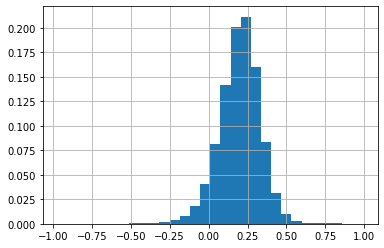

In [11]:
weights = pd.np.ones_like(df_blast.AttackAngle.values) / len(df_blast.AttackAngle.values)
df_blast.AttackAngle.hist(bins=30, weights=weights) 

The distribution of Bat Speed from Blast

C:\Users\allen\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


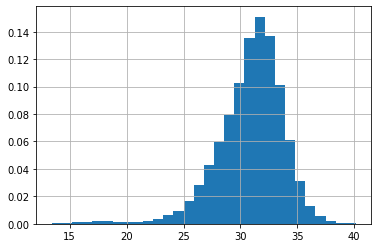

In [12]:
weights = pd.np.ones_like(df_blast.BatSpeed.values) / len(df_blast.BatSpeed.values)
df_blast.BatSpeed.hist(bins=30, weights=weights) 

The distribution of Connection from Blast

C:\Users\allen\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


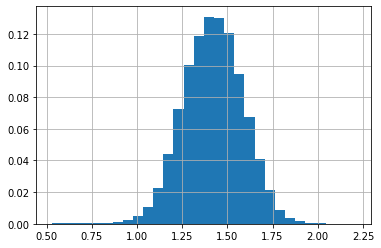

In [13]:
weights = pd.np.ones_like(df_blast.Connection.values) / len(df_blast.Connection.values)
df_blast.Connection.hist(bins=30, weights=weights) 

The distribution of Early Connection from Blast

C:\Users\allen\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


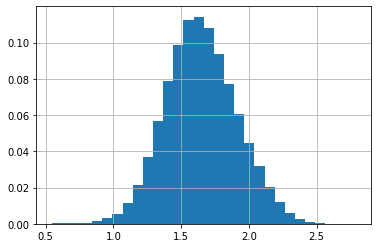

In [14]:
weights = pd.np.ones_like(df_blast.EarlyConnection.values) / len(df_blast.EarlyConnection.values)
df_blast.EarlyConnection.hist(bins=30, weights=weights) 

The distribution of Planar Efficiency from Blast

C:\Users\allen\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


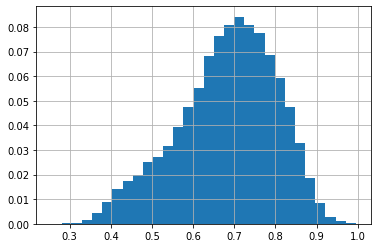

In [15]:
weights = pd.np.ones_like(df_blast.PlanarEfficiency.values) / len(df_blast.PlanarEfficiency.values)
df_blast.PlanarEfficiency.hist(bins=30, weights=weights) 

The distribution of Rotational Acceleration from Blast

C:\Users\allen\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


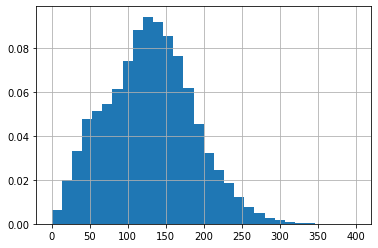

In [16]:
weights = pd.np.ones_like(df_blast.RotationalAcceleration.values) / len(df_blast.RotationalAcceleration.values)
df_blast.RotationalAcceleration.hist(bins=30, weights=weights) 

### Mean value of data from blast with different BatterId

In [17]:
df_blast_mean = df_blast.groupby('BatterId').mean()
df_blast_mean = df_blast_mean.drop(['Handedness'], axis=1)

Of the six variables, most of them are normally distributed. Thus I decided to use mean value as my input features for clustering.

## Clustering the data from blast

Usually, I do clustering with these steps: scaling the input features, dimensionality reduction, and choosing one clustering algorithm that could perform well on the data. 

### Step 1: Reduce Dimensionality

The data contained 7 features (columns) and it is a bit hard for me to get a broad overview of all of them through traditional methods of visualization. Luckily, this is what doing PCA is all about. You take a ton of features, project them onto a lower-dimensional space, reduce them down to just a few important principal ones, and visualize them.

Find the optimal number of components which capture the greatest amount of variance in the data. In my case, as seen in the figure below, that number is four.

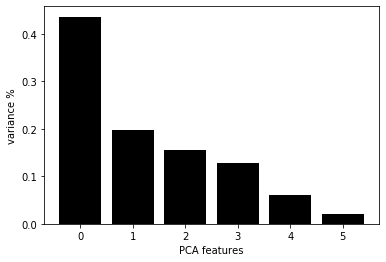

In [18]:
X = StandardScaler().fit_transform(df_blast_mean)

# Create a PCA instance: pca
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Above figure shows that the first four components explain the majority of the variance in our data. For this visualization use case, I will quickly plot just the first two. I do this to notice if there are any clear clusters.

Text(0, 0.5, 'PCA 2')

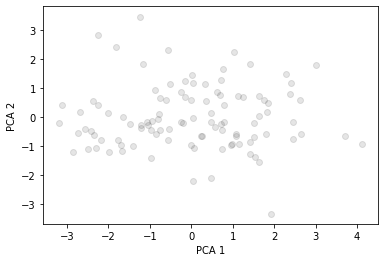

In [19]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Why K-means clustering

Selecting an appropriate clustering algorithm for one's dataset is often difficult due to the number of choices available. Some important factors that affect this decision include the characteristics of the clusters, the features of the dataset, the number of outliers, and the number of data objects.

We can explore how these factors help determine which approach is most appropriate by looking at three popular categories of clustering algorithms:

Partitional clustering
Hierarchical clustering
Density-based clustering

### Step 2: Find the Clusters

In this step, I will use k-means clustering to view the top four PCA components. In order to do this, I will first fit these principal components to the k-means algorithm and determine the best number of clusters. Determining the ideal number of clusters for our k-means model can be done by measuring the sum of the squared distances to the nearest cluster center aka inertia. Much like the scree plot for PCA, the k-means scree plot below indicates the percentage of variance explained, but in slightly different terms, as a function of the number of clusters.

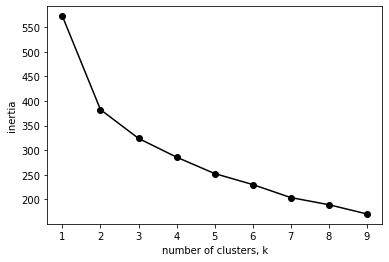

In [20]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:4])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Figure shows that after 2 clusters at (the elbow) the change in the value of inertia is no longer significant and most likely, neither is the variance of the rest of the data after the elbow point. However I want to classify players into more groups, 4, to come up with more kinds of improvement plan.

In [21]:
kmeans = KMeans(n_clusters=4).fit(PCA_components.iloc[:,:4])
kmeans.labels_

array([0, 2, 0, 3, 0, 3, 3, 0, 3, 0, 1, 2, 2, 2, 2, 2, 1, 2, 1, 3, 0, 3,
       0, 3, 1, 1, 0, 3, 3, 3, 3, 0, 2, 1, 3, 1, 1, 0, 3, 3, 1, 0, 0, 3,
       0, 3, 0, 3, 2, 3, 0, 1, 0, 1, 2, 0, 0, 3, 3, 0, 0, 1, 3, 2, 0, 1,
       1, 1, 0, 2, 3, 1, 1, 3, 1, 3, 2, 3, 1, 2, 1, 3, 1, 3, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 1, 1, 3, 0, 3, 3, 1, 2, 2, 2, 2])

### Variance within variables and between clusters
One assumption of variable importance in cluster tasks is that if the average value of a variable ordered by clusters differs significantly among each other, that variable is likely important in creating the clusters.
We start by simply aggregating the data based on the generated clusters and retrieving the mean value per variable:

In [22]:
df_scaled = StandardScaler().fit_transform(df_blast_mean)
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df_blast_mean))
df_scaled.columns=['AttackAngle','BatSpeed','Connection','EarlyConnection','PlanarEfficiency','RotationalAcceleration']
df_scaled['labels'] = kmeans.labels_
df_mean = df_scaled.groupby('labels').mean()
df_mean

,AttackAngle,BatSpeed,Connection,EarlyConnection,PlanarEfficiency,RotationalAcceleration
labels,,,,,,
0,-1.069812,0.654203,-0.743602,-0.705324,0.560460,0.701947
1,0.884403,0.430817,-0.519233,-0.541611,0.647457,0.591313
2,-0.554017,-1.311083,-0.040884,-0.248655,0.135937,-0.807116
3,0.297197,-0.085534,0.884946,0.981160,-0.911634,-0.488393


Next, I simply calculate the variance of means between clusters within each variable and select the variables:

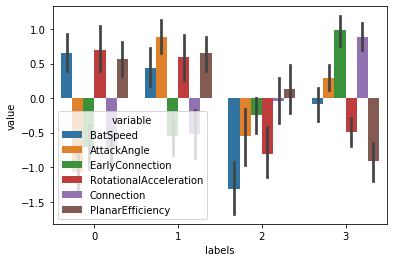

In [23]:
results = pd.DataFrame(columns=['Variable', 'Var'])

for column in df_mean.columns[0:6]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values('Var', ascending=False).head(6).Variable.values) + ['labels']
tidy = df_scaled[selected_columns].melt(id_vars='labels')
sns.barplot(x='labels', y='value', hue='variable', data=tidy)

I can now more clearly see differences between clusters. For example, in cluster 0 you can see that every single person has less thn average Blast data except for PlanarEfficiency. 

After having a brief look at the clustering result, I need to interpret the clusters. The easiest way to describe clusters is by using a set of rules. I could automatically generate the rules by training a decision tree model using original features and clustering result as the label. I wrote a cluster_report function that wraps the decision tree training and rules extraction from the tree.

In [24]:
#from IPython.display import display, HTML
#from sklearn.tree import _tree, DecisionTreeClassifier

def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def get_class_rules(tree: DecisionTreeClassifier, feature_names: list):
  inner_tree: _tree.Tree = tree.tree_
  classes = tree.classes_
  class_rules_dict = dict()

  def tree_dfs(node_id=0, current_rule=[]):
    # feature[i] holds the feature to split on, for the internal node i.
    split_feature = inner_tree.feature[node_id]
    if split_feature != _tree.TREE_UNDEFINED: # internal node
      name = feature_names[split_feature]
      threshold = inner_tree.threshold[node_id]
      # left child
      left_rule = current_rule + ["({} <= {})".format(name, threshold)]
      tree_dfs(inner_tree.children_left[node_id], left_rule)
      # right child
      right_rule = current_rule + ["({} > {})".format(name, threshold)]
      tree_dfs(inner_tree.children_right[node_id], right_rule)
    else: # leaf
      dist = inner_tree.value[node_id][0]
      dist = dist/dist.sum()
      max_idx = dist.argmax()
      if len(current_rule) == 0:
        rule_string = "ALL"
      else:
        rule_string = " and ".join(current_rule)
      # register new rule to dictionary
      selected_class = classes[max_idx]
      class_probability = dist[max_idx]
      class_rules = class_rules_dict.get(selected_class, [])
      class_rules.append((rule_string, class_probability))
      class_rules_dict[selected_class] = class_rules
    
  tree_dfs() # start from root, node_id = 0
  return class_rules_dict

def cluster_report(data: pd.DataFrame, clusters, min_samples_leaf=50, pruning_level=0.01):
    # Create Model
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, ccp_alpha=pruning_level)
    tree.fit(data, clusters)
    
    # Generate Report
    feature_names = data.columns
    class_rule_dict = get_class_rules(tree, feature_names)

    report_class_list = []
    for class_name in class_rule_dict.keys():
        rule_list = class_rule_dict[class_name]
        combined_string = ""
        for rule in rule_list:
            combined_string += "[{}] {}\n\n".format(rule[1], rule[0])
        report_class_list.append((class_name, combined_string))
        
    cluster_instance_df = pd.Series(clusters).value_counts().reset_index()
    cluster_instance_df.columns = ['class_name', 'instance_count']
    report_df = pd.DataFrame(report_class_list, columns=['class_name', 'rule_list'])
    report_df = pd.merge(cluster_instance_df, report_df, on='class_name', how='left')
    pretty_print(report_df.sort_values(by='class_name')[['class_name', 'instance_count', 'rule_list']])

The number in the bracket is showing the proportion of class_name satisfying the rule. For example, [0.8666666666666667] (EarlyConnection <= 1.7521717548370361)  means for all instances that satisfy (EarlyConnection <= 1.7521717548370361) rule, 87% of them are in cluster 0

In [25]:
df_blast_mean['labels'] = kmeans.labels_
cluster_report(df_blast_mean.drop(['labels'], axis=1), df_blast_mean['labels'], min_samples_leaf=15, pruning_level=0.01)

,class_name,instance_count,rule_list
2,0,23,[0.84] (EarlyConnection <= 1.7521717548370361) and (AttackAngle <= 0.1938438042998314) and (BatSpeed > 31.03825283050537)
1,1,27,[0.95] (EarlyConnection <= 1.7521717548370361) and (AttackAngle > 0.1938438042998314) and (EarlyConnection <= 1.6067730784416199)
3,2,18,[0.8666666666666667] (EarlyConnection <= 1.7521717548370361) and (AttackAngle <= 0.1938438042998314) and (BatSpeed <= 31.03825283050537)
0,3,36,[0.47058823529411764] (EarlyConnection <= 1.7521717548370361) and (AttackAngle > 0.1938438042998314) and (EarlyConnection > 1.6067730784416199)[0.9629629629629629] (EarlyConnection > 1.7521717548370361)


## Build my own classification model for xwOBA

To properly examine the game performance for these three groups of batters, I decide to come up with xwOBA value using the data I have from trackman

Take a look at what I have

In [26]:
df_trackman.PitchCall.unique()

array(['StrikeCalled', 'FoulBall', 'BallCalled', 'StrikeSwinging',
       'InPlay', 'HitByPitch', 'BallIntentional', 'Undefined',
       'CatchersInterference'], dtype=object)

In [27]:
df_trackman.PlayResult.unique()

array(['Undefined', 'Out', 'Single', 'Sacrifice', 'Double', 'Triple',
       'HomeRun', 'Error', 'FieldersChoice'], dtype=object)

wOBA only considers balls in play, walk and hitbypitch; similarly, xwOBA considers the probability of each event using exit velocity and launch angle.

In [28]:
#filter to wanted columns
event_include = ['BallCalled', 'InPlay', 'HitByPitch']
df_trackman_xwOBA = df_trackman[df_trackman['PitchCall'].isin(event_include)]

#assign hitbypitch, walk to column 'PlayResult' 
df_trackman_xwOBA.loc[df_trackman_xwOBA['PitchCall']=='HitByPitch', 'PlayResult'] = 'HitByPitch'
df_trackman_xwOBA.loc[(df_trackman_xwOBA['PitchCall']=='BallCalled') & (df_trackman_xwOBA['Balls']==3), 'PlayResult'] = 'Walk'
df_trackman_xwOBA = df_trackman_xwOBA.drop(df_trackman_xwOBA[df_trackman_xwOBA.PlayResult=='Undefined'].index)

#any long-version out = out
outs = ['Out', 'Sacrifice', 'Error', 'FieldersChoice']
df_trackman_xwOBA.loc[df_trackman_xwOBA['PlayResult'].isin(outs), 'PlayResult'] = 'Out'

# verify remaining outcomes
df_trackman_xwOBA['PlayResult'].unique()

C:\Users\allen\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array(['Out', 'Walk', 'Single', 'Double', 'Triple', 'HomeRun',
       'HitByPitch'], dtype=object)

Now that I have simplified plate-appearance outcomes, I'll join in Fangraphs' wOBA values for the given season(2019).

In [29]:
woba_weights = pd.read_csv(r'C:\Users\allen\Desktop\Baseball Analytics Coding Task\woba_weights.csv')
woba_weights = woba_weights.loc[woba_weights['Season']==2019, ['wBB', 'wHBP', 'w1B', 'w2B', 'w3B', 'wHR']]
woba_weights

,wBB,wHBP,w1B,w2B,w3B,wHR
2,0.69,0.719,0.87,1.217,1.529,1.94


Assign the values to my dataframe 'df_trackman_xwOBA'

In [30]:
df_trackman_xwOBA['wBB']=0.69
df_trackman_xwOBA['wHBP']=0.719
df_trackman_xwOBA['w1B']=0.87
df_trackman_xwOBA['w2B']=1.217
df_trackman_xwOBA['w3B']=1.529
df_trackman_xwOBA['wHR']=1.94

Build the models from rows with actual exit velocity, launch angle values

In [31]:
df_trackman_xwOBA_contact_known = df_trackman_xwOBA[df_trackman_xwOBA['ExitSpeed'].notnull()]
event_include = ['Single', 'Out', 'Double', 'Triple', 'HomeRun']
df_trackman_xwOBA_contact_known = df_trackman_xwOBA_contact_known[df_trackman_xwOBA_contact_known['PlayResult'].isin(event_include)]

My goal here isn't necessarily to predict the outcome of a hit as accurately as possible. 

If I'm trying to uncover a hitter's true talent, I'll build models using only the things the hitter is responsible for:

batted ball speed

batted ball vertical angle (launch angle)

batted ball horizontal angle (spray angle)

handedness (to standardize spray angle)

As far as the models themselves go, I mostly care about the probabilistic predictions from each model. I can get the outcome classification from that data, but more importantly, those probabilities are useful. If we assign a value to the results of a batted ball, we can calculate the expected value of the batted ball and use that to value a hitter.

I've settled on 6 popular classifiers to compare. I'll use:

logistic regression
k-nearest neighbors
support vector machine
decision tree
random forest
gradient boosting

And I'm going to use 4 metrics to evaluate the models, which together should give a good picture of the best overall model:

F1 score (weighted by instances of each label)
ROC AUC (computed by label and weighted by frequency)
balanced accuracy (for imbalanced datasets)
log loss
I'll run with largely default settings for each of the models to keep a relatively level playing field.

In [32]:
df_trackman_xwOBA_contact_known

# one-hot encode handedness
df_trackman_xwOBA_contact_known = pd.concat([df_trackman_xwOBA_contact_known, pd.get_dummies(df_trackman_xwOBA_contact_known.Bats)], axis=1)

# drop unnecessary columns & rename to be a little clearer
df_trackman_xwOBA_contact_known = df_trackman_xwOBA_contact_known.drop(columns=['Left', 'S'])
df_trackman_xwOBA_contact_known = df_trackman_xwOBA_contact_known.rename(columns={'Right': 'is_Right'})

In [33]:
#select the variables I want to include
df_trackman_xwOBA_contact_known_model = df_trackman_xwOBA_contact_known[['ExitSpeed', 'VertAngle', 'HorzAngle', 'is_Right', 'PlayResult']]

#scale the numeric data
to_scale = ['ExitSpeed', 'VertAngle', 'HorzAngle']
df_trackman_xwOBA_contact_known_model[to_scale] = StandardScaler().fit_transform(df_trackman_xwOBA_contact_known_model[to_scale])

#assign x and y for my model
X = df_trackman_xwOBA_contact_known_model[['ExitSpeed', 'VertAngle', 'HorzAngle', 'is_Right']]
y = df_trackman_xwOBA_contact_known_model['PlayResult']

C:\Users\allen\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\allen\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [34]:
#from imblearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import cross_validate
#from sklearn.metrics import f1_score, accuracy_score, log_loss, roc_auc_score, make_scorer
#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from xgboost import XGBClassifier

# scoring metrics
scoring = {
    'f1_weighted': 'f1_weighted',
    'accuracy': 'balanced_accuracy',
    'roc_auc': 'roc_auc_ovr_weighted',
    'neg_log_loss': 'neg_log_loss'
    }

# for results df
eval_cols = [
    'models',
    'F1 Score',
    'Balanced Accuracy',
    'ROC AUC',
    'Neg Log Loss'
    ]

# define classifier models
classifiers = [
    LogisticRegression(multi_class='multinomial'),
    KNeighborsClassifier(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
    ]

# classifier names
clf_names = [
    'Logistic Regression',
    'KNN',
    'SVM',
    'Decision Tree',
    'Random Forest',
    'Gradient Boosting',
    'XGBClassifier'
    ]

In [35]:
#import time as time

f1, acc, roc_auc, log_loss = [], [], [], []
for clf, clf_nm in zip(classifiers, clf_names):

    start = time.time()
    
    # cross-validate 5 times
    res = cross_validate(clf, X, y, cv=5, scoring=scoring)
    results = pd.DataFrame(res)
    
    stop = time.time()

    print('Time to cross-validate %s = %0.3f min.' % (clf_nm, (stop - start) / 60))

    # save average scores
    f1.append(np.mean(results.test_f1_weighted))
    acc.append(np.mean(results.test_accuracy))
    roc_auc.append(np.mean(results.test_roc_auc))
    log_loss.append(np.mean(results.test_neg_log_loss))

# save results to df
model_eval = pd.DataFrame(data=zip(clf_names, f1, acc, roc_auc, log_loss),
                          columns=eval_cols)

display(model_eval)

Time to cross-validate Logistic Regression = 0.068 min.
Time to cross-validate KNN = 0.037 min.
Time to cross-validate SVM = 1.311 min.
Time to cross-validate Decision Tree = 0.010 min.
Time to cross-validate Random Forest = 0.176 min.
Time to cross-validate Gradient Boosting = 0.636 min.
Time to cross-validate XGBClassifier = 0.195 min.


,models,F1 Score,Balanced Accuracy,ROC AUC,Neg Log Loss
0,Logistic Regression,0.510787,0.264336,0.668918,-0.877740
1,KNN,0.751605,0.508681,0.853699,-2.626078
2,SVM,0.731226,0.479989,0.852862,-0.631656
3,Decision Tree,0.696652,0.473227,0.718004,-10.498888
4,Random Forest,0.755014,0.510904,0.874318,-0.891982
5,Gradient Boosting,0.751686,0.497045,0.876588,-0.610168
6,XGBClassifier,0.743082,0.481209,0.873540,-0.600307


Overall, the XGBoost model was the best with better combination of f1 score, roc auc and log loss. I will make the prediction using it.

In [36]:
model=XGBClassifier()
model.fit(X, y)
hit_probs = pd.DataFrame(model.predict_proba(X), columns=model.classes_)
hit_probs

,Double,HomeRun,Out,Single,Triple
0,0.013125,0.002463,0.405336,0.576670,0.002406
1,0.006197,0.001341,0.679590,0.311756,0.001116
2,0.278198,0.001274,0.556532,0.161490,0.002505
3,0.022775,0.001588,0.413983,0.559204,0.002450
4,0.008117,0.001791,0.854845,0.133951,0.001296
...,...,...,...,...,...
10838,0.115632,0.309597,0.542037,0.018721,0.014012
10839,0.091019,0.014651,0.712510,0.164413,0.017406
10840,0.034326,0.003106,0.411727,0.547865,0.002976
10841,0.068506,0.002443,0.093785,0.799056,0.036209


Separate the df_trackman_xwOBA into three:
1. df_trackman_xwOBA_contact_known: the one that I built earlier for those contact plays with exit velo, launch angle data
2. df_trackman_xwOBA_contact_unknown: those contct plays without exit velo, launch angle data
3. df_trackman_xwOBA_noncontact: non-contact plays

In [37]:
df_trackman_xwOBA_contact = df_trackman_xwOBA[df_trackman_xwOBA['PlayResult'].isin(['Out', 'Single', 'Double', 'Triple', 'HomeRun'])]
df_trackman_xwOBA_contact_unknown = df_trackman_xwOBA_contact[df_trackman_xwOBA_contact.ExitSpeed.isnull()]
df_trackman_xwOBA_noncontact = df_trackman_xwOBA[df_trackman_xwOBA['PlayResult'].isin(['Walk', 'HitByPitch'])]

Minor adjustments to join the tables together

In [38]:
df_trackman_xwOBA_contact_known = df_trackman_xwOBA_contact_known.reset_index()
df_trackman_xwOBA_contact_known[['Double', 'HomeRun', 'Out', 'Single', 'Triple']] = hit_probs
df_trackman_xwOBA_contact_known = df_trackman_xwOBA_contact_known.drop(columns=['index'])
df_trackman_xwOBA_noncontact['Double']=np.zeros(len(df_trackman_xwOBA_noncontact))
df_trackman_xwOBA_noncontact['HomeRun']=np.zeros(len(df_trackman_xwOBA_noncontact))
df_trackman_xwOBA_noncontact['Out']=np.zeros(len(df_trackman_xwOBA_noncontact))
df_trackman_xwOBA_noncontact['Single']=np.zeros(len(df_trackman_xwOBA_noncontact))
df_trackman_xwOBA_noncontact['Triple']=np.zeros(len(df_trackman_xwOBA_noncontact))
df_trackman_xwOBA_combine = pd.concat([df_trackman_xwOBA_contact_known, df_trackman_xwOBA_noncontact])

# add marker for ball in play
df_trackman_xwOBA_combine['contact'] = np.zeros(len(df_trackman_xwOBA_combine))
df_trackman_xwOBA_combine.loc[df_trackman_xwOBA_combine['Double']!=0, 'contact'] = 1

C:\Users\allen\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\allen\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\allen\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

Now I'll write two functions: one for determing the xwOBA value of a PA, and one for determing the wOBA value of a PA.

In [39]:
def calc_xwoba(data):
    '''
    Calculate the xwOBA value for a plate appearance. If PA ends on a ball put in play,
    use hit probabilities to calculate expected wOBA. Else, use known wOBA value.

    '''

    if data['contact'] == 1:
        xwoba = (data['Single'] * data['w1B'] + data['Double'] * data['w2B'] +
                 data['Triple'] * data['w3B'] + data['HomeRun'] * data['wHR'])

    elif data['PlayResult'] == 'Walk':
        xwoba = data['wBB']

    elif data['PlayResult'] == 'HitByPitch':
        xwoba = data['wHBP']

    return round(xwoba, 3)


def calc_woba(data):
    '''
    Calculate the wOBA value for a plate appearance. Use the known wOBA value for each outcome.

    '''

    if data['PlayResult'] == 'Single':
        woba = data['w1B']

    elif data['PlayResult'] == 'Double':
        woba = data['w2B']

    elif data['PlayResult'] == 'Triple':
        woba = data['w3B']

    elif data['PlayResult'] == 'HomeRun':
        woba = data['wHR']

    elif data['PlayResult'] == 'Walk':
        woba = data['wBB']

    elif data['PlayResult'] == 'HitByPitch':
        woba = data['wHBP']

    else:
        woba = 0

    return round(woba, 3)

In [40]:
# calculate xwOBA and wOBA for each PA
df_trackman_xwOBA_combine['xwoba'] = df_trackman_xwOBA_combine.apply(calc_xwoba, axis=1)
df_trackman_xwOBA_combine['woba'] = df_trackman_xwOBA_combine.apply(calc_woba, axis=1)

Take a look at my df_blast_mean dataframe again

In [41]:
df_blast_mean

,AttackAngle,BatSpeed,Connection,EarlyConnection,PlanarEfficiency,RotationalAcceleration,labels
BatterId,,,,,,,
002a3a2c,0.143681,31.354873,1.252272,1.285903,0.802534,192.123135,0
02923b59,0.101737,30.133884,1.375228,1.617774,0.591748,58.980982,2
0325748c,0.146599,31.630133,1.308664,1.363582,0.706607,138.922948,0
0fa51742,0.167412,31.143447,1.546772,1.840998,0.656088,148.340924,3
121483c1,0.069697,30.940481,1.410839,1.589855,0.792978,151.870574,0
...,...,...,...,...,...,...,...
f70b0d82,0.197305,32.519340,1.315247,1.603070,0.704143,115.056059,1
f7985ef1,0.193293,28.549342,1.246320,1.318045,0.802601,97.471247,2
f8c3e062,0.204387,30.358646,1.255127,1.498686,0.714045,102.217084,2


Combine the practice data (df_blast_mean) and in-game data (df_trackman_xwOBA_combine) together

In [42]:
df_trackman_xwOBA_combine = df_trackman_xwOBA_combine.merge(df_blast_mean, how='left', on='BatterId')
df_trackman_xwOBA_combine

,Date,Inning,Top,Outs,Balls,Strikes,PitcherId,BatterId,Bats,Throws,...,contact,xwoba,woba,AttackAngle,BatSpeed,Connection,EarlyConnection,PlanarEfficiency,RotationalAcceleration,labels
0,2019-05-03,8,Bottom,1,2,2,67392fed,b4417992,Right,Right,...,1.0,0.526,0.87,0.327698,30.455056,1.350584,1.433203,0.761327,194.190842,1
1,2019-04-13,8,Bottom,1,0,0,be3a7aca,367fb7f9,Right,Left,...,1.0,0.283,0.00,0.260505,31.732834,1.546902,1.519724,0.719052,144.450985,1
2,2019-05-07,2,Bottom,0,1,0,b1b82ec8,b4417992,Right,Left,...,1.0,0.485,0.00,0.327698,30.455056,1.350584,1.433203,0.761327,194.190842,1
3,2019-04-10,2,Bottom,0,0,2,437d8c83,741921ec,Right,Left,...,1.0,0.521,0.00,0.079232,31.690686,1.360946,1.524809,0.666527,129.875616,0
4,2019-05-17,3,Bottom,0,2,0,245b80b8,b4417992,Right,Right,...,1.0,0.132,0.00,0.327698,30.455056,1.350584,1.433203,0.761327,194.190842,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12792,2019-08-15,1,Bottom,1,3,0,ef1db951,5070f997,Left,Right,...,0.0,0.690,0.69,0.140097,35.364663,1.284470,1.686195,0.690270,152.497806,0
12793,2019-08-15,2,Bottom,2,3,2,ef1db951,38598587,Left,Right,...,0.0,0.690,0.69,0.206223,27.439035,1.628445,2.041538,0.649736,129.359596,3
12794,2019-08-15,5,Bottom,0,3,1,ef1db951,38598587,Left,Right,...,0.0,0.690,0.69,0.206223,27.439035,1.628445,2.041538,0.649736,129.359596,3
12795,2019-08-15,2,Bottom,0,3,0,ef1db951,e28cf85c,Left,Right,...,0.0,0.690,0.69,0.265180,31.333590,1.066597,1.270858,0.807781,217.441935,1


In [43]:
df_trackman_xwOBA_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12797 entries, 0 to 12796
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    12797 non-null  object 
 1   Inning                  12797 non-null  int64  
 2   Top                     12797 non-null  object 
 3   Outs                    12797 non-null  int64  
 4   Balls                   12797 non-null  int64  
 5   Strikes                 12797 non-null  int64  
 6   PitcherId               12797 non-null  object 
 7   BatterId                12797 non-null  object 
 8   Bats                    12797 non-null  object 
 9   Throws                  12797 non-null  object 
 10  PitchNumber             12797 non-null  int64  
 11  PAofInning              12797 non-null  int64  
 12  PitchofPA               12797 non-null  int64  
 13  PlateSide               12783 non-null  float64
 14  PlateHeight             12783 non-null

## Analysis

All in all, I used cluster analysis on practice data (blast) and come up with four groups. To make development plans for them, I have to see the characteristics of these four groups and their respective in-game performance. xwOBA for those contact plays is my choice to evaluate their performance. 

In [44]:
df_trackman_xwOBA_combine_contact = df_trackman_xwOBA_combine[df_trackman_xwOBA_combine.ExitSpeed.notnull()]
df_trackman_xwOBA_combine_contact.groupby('labels').mean()['xwoba']

labels
0    0.423701
1    0.398724
2    0.309546
3    0.378648
Name: xwoba, dtype: float64

I take a look at wOBA as well to not only evaluate their performance, but also check if my classification models is effective. Judging from similar numbers for xwOBA and wOBA, it seems alright.

In [45]:
df_trackman_xwOBA_combine_contact.groupby('labels').mean()['woba']

labels
0    0.421520
1    0.405644
2    0.301480
3    0.369324
Name: woba, dtype: float64

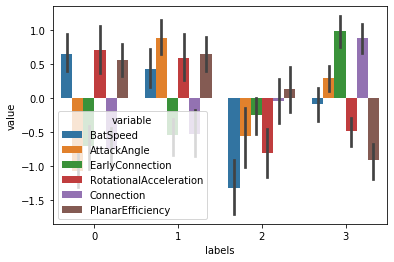

In [46]:
results = pd.DataFrame(columns=['Variable', 'Var'])

for column in df_mean.columns[0:6]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values('Var', ascending=False).head(6).Variable.values) + ['labels']
tidy = df_scaled[selected_columns].melt(id_vars='labels')
sns.barplot(x='labels', y='value', hue='variable', data=tidy)

There are two parameters that we can adjust for cluster_report: min_samples_leaf and pruning_level. Those parameters are controlling the decision tree complexity. To get a more general rule, we could increase the value of min_samples_leaf or pruning_level. Otherwise, if we want to get a more detail rule, we could decrease the value of min_samples_leaf or pruning_level.

In [47]:
cluster_report(df_blast_mean.drop(['labels'], axis=1), df_blast_mean['labels'], min_samples_leaf=15, pruning_level=0.01)

,class_name,instance_count,rule_list
2,0,23,[0.84] (EarlyConnection <= 1.7521717548370361) and (AttackAngle <= 0.1938438042998314) and (RotationalAcceleration > 120.16216659545898)
1,1,27,[0.95] (EarlyConnection <= 1.7521717548370361) and (AttackAngle > 0.1938438042998314) and (EarlyConnection <= 1.6067730784416199)
3,2,18,[0.8666666666666667] (EarlyConnection <= 1.7521717548370361) and (AttackAngle <= 0.1938438042998314) and (RotationalAcceleration <= 120.16216659545898)
0,3,36,[0.47058823529411764] (EarlyConnection <= 1.7521717548370361) and (AttackAngle > 0.1938438042998314) and (EarlyConnection > 1.6067730784416199)[0.9629629629629629] (EarlyConnection > 1.7521717548370361)


In [48]:
cluster_report(df_blast_mean.drop(['labels'], axis=1), df_blast_mean['labels'], min_samples_leaf=5, pruning_level=0.01)

,class_name,instance_count,rule_list
2,0,23,[0.9545454545454546] (EarlyConnection <= 1.7521717548370361) and (AttackAngle <= 0.1938438042998314) and (BatSpeed > 30.30543613433838) and (AttackAngle <= 0.17615575343370438)[0.4] (EarlyConnection <= 1.7521717548370361) and (AttackAngle <= 0.1938438042998314) and (BatSpeed > 30.30543613433838) and (AttackAngle > 0.17615575343370438)
1,1,27,[1.0] (EarlyConnection <= 1.7521717548370361) and (AttackAngle > 0.1938438042998314) and (PlanarEfficiency > 0.6671400368213654) and (BatSpeed > 30.50994300842285)
3,2,18,[1.0] (EarlyConnection <= 1.7521717548370361) and (AttackAngle <= 0.1938438042998314) and (BatSpeed <= 30.30543613433838)[0.6] (EarlyConnection <= 1.7521717548370361) and (AttackAngle > 0.1938438042998314) and (PlanarEfficiency > 0.6671400368213654) and (BatSpeed <= 30.50994300842285)
0,3,36,[0.8] (EarlyConnection <= 1.7521717548370361) and (AttackAngle > 0.1938438042998314) and (PlanarEfficiency <= 0.6671400368213654)[0.9629629629629629] (EarlyConnection > 1.7521717548370361)


## Improvement Plans

Finally I will combine what I see from the barplot, rules, their xwOBA and come up with improvement plans.

Batters in cluster 0 seem to have the best performance. When we look at their clustering feature, (EarlyConnection <= 1.7521717548370361) and (AttackAngle <= 0.1938438042998314) and (BatSpeed > 30.30543613433838) are the general rules. Maintaining those would be my first suggestion. At the same time, they could try on different hitting strategies to see if the variation in other Blast Motion data can lead to better performance. But I think it is more case by case and individuals should focus on maintaining the three features when trying to make minor adjustments.

For a better performance, I would suggest batters in cluster 2, who already possess the features (EarlyConnection <= 1.7521717548370361) and (AttackAngle <= 0.1938438042998314), to work on BatSpeed. I would be really curious about how they perform in games if they push their BatSpeed over the threshold 30.3. Although having the worst xwOBA value in games, they are actually not that far away from cluster 0 Blast Motion-wise. 

As for batters in cluster 1, they already possess similar EarlyConnection and  BatSpeed as those in cluster 0. Decreasing their AttackAngle could be beneficial for them to catch players in cluster 0. 

As for batters in cluster 3, they could start by decreasing PlanarEfficiency to catch players in cluster 1, since they already possess similar EarlyConnection and AttackAngle. Decreasing their AttackAngle could be their next step. 

All in all, this project provides general rules for players to make adjustments with their Blast Motion data in order for a better performance on the field. 